In [1]:
import pandas as pd
import numpy as np
import re
import ast
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
true_pred = pd.read_csv('/Users/alfioleanza/progetto_tesi/dataset-eeg/inference_20250327_171717/true_pred.csv')

In [3]:
def convert_to_array(x):
        x = re.sub(r'(?<=\d)\s+(?=\d)', ',', x)
        x = '[' + x + ']'
        array = np.array(ast.literal_eval(x))
        return array 

In [4]:
true_pred['softmax_values'] = true_pred['softmax_values'].apply(lambda x: convert_to_array(x))
true_pred['softmax_values'] = true_pred['softmax_values'].apply(lambda x: x.squeeze())


In [5]:
true_pred_train = true_pred[true_pred['dataset'] == 'training']
true_pred_val = true_pred[true_pred['dataset'] == 'validation']
true_pred_test = true_pred[true_pred['dataset'] == 'test']

In [6]:
true_pred

,crop_file,activation_values,dataset,softmax_values,pred_label,true_label,original_rec,crop_start_sample,crop_end_sample
0,00000848.npy,[ 1.0532185 -1.5921667 -0.8496607],training,"[0.8195938, 0.05817313, 0.12223307]",0,0,sub-037,0,499.0
1,00000849.npy,[ 0.8592405 -0.8918216 -0.32704002],training,"[0.67615795, 0.1173739, 0.20646815]",0,0,sub-037,500,999.0
2,00000850.npy,[ 0.89024836 -1.5663235 -0.599953 ],training,"[0.7627442, 0.06538879, 0.17186707]",0,0,sub-037,1000,1499.0
3,00000851.npy,[ 0.9642988 -1.5698762 -0.83838975],training,"[0.80374086, 0.06375847, 0.13250075]",0,0,sub-037,1500,1999.0
4,00000852.npy,[ 0.9176249 -1.4399661 -0.5990748],training,"[0.76098704, 0.07202587, 0.1669871]",0,0,sub-037,2000,2499.0
...,...,...,...,...,...,...,...,...,...
69789,00069084.npy,[-3.1664958 -1.7627978 -0.22231679],validation,"[0.04155363, 0.16913258, 0.78931385]",2,2,sub-026,446500,446999.0
69790,00069085.npy,[-1.5803745 -0.6570947 -0.06765006],validation,"[0.12412163, 0.3124804, 0.563398]",2,2,sub-026,447000,447499.0
69791,00069086.npy,[-0.6699866 -0.1551984 -0.40366274],validation,"[0.2513547, 0.4205878, 0.3280575]",1,2,sub-026,447500,447999.0
69792,00069087.npy,[-0.6042401 -0.30352032 -0.33559638],validation,"[0.27329725, 0.36917832, 0.35752445]",1,2,sub-026,448000,448499.0


In [7]:
# prova per controllare se la riga di codice prende effettivamente la probabilità del true_label
prova = true_pred.apply(lambda row: row['softmax_values'][row['true_label']], axis=1)

In [8]:
prova

0        0.819594
1        0.676158
2        0.762744
3        0.803741
4        0.760987
           ...   
69789    0.789314
69790    0.563398
69791    0.328058
69792    0.357524
69793    0.320812
Length: 69794, dtype: float64

# Majority voting

In [ ]:
def majority_voting(df, group_col, pred_col, true_col):

    majority_voting = df.groupby(group_col)[pred_col].agg(lambda x: x.mode()[0]).reset_index()

    true_labels = df.groupby(group_col)[true_col].first().reset_index() 

    results = pd.merge(majority_voting, true_labels, on=group_col) 

    results['correct'] = results[pred_col] == results[true_col] 
    
    accuracy = ((results['correct'].mean()).round(2)) * 100
    
    return accuracy, results


In [9]:
train_accuracy, train_mv = majority_voting(true_pred_train, 'original_rec', 'pred_label', 'true_label')
print('Accuracy:',train_accuracy,'%')
display(train_mv)

Accuracy: 67.0 %


,original_rec,pred_label,true_label,correct
0,sub-001,2,2,True
1,sub-002,0,2,False
2,sub-003,0,2,False
3,sub-004,2,2,True
4,sub-005,2,2,True
5,sub-006,2,2,True
6,sub-007,2,2,True
7,sub-008,2,2,True
8,sub-009,2,2,True
9,sub-010,2,2,True


In [41]:
val_accuracy, val_mv = majority_voting(true_pred_val, 'original_rec','pred_label','true_label')
print('Accuracy:',val_accuracy,'%')
display(val_mv)

Accuracy: 67.0 %


,original_rec,pred_label,true_label,correct
0,sub-022,2,2,True
1,sub-023,2,2,True
2,sub-024,2,2,True
3,sub-025,0,2,False
4,sub-026,2,2,True
5,sub-027,2,2,True
6,sub-028,2,2,True
7,sub-054,0,0,True
8,sub-055,0,0,True
9,sub-056,0,0,True


In [42]:
test_accuracy, test_mv = majority_voting(true_pred_test, 'original_rec','pred_label','true_label')
print('Accuracy:',test_accuracy,'%')
display(test_mv)

Accuracy: 63.0 %


,original_rec,pred_label,true_label,correct
0,sub-029,2,2,True
1,sub-030,2,2,True
2,sub-031,0,2,False
3,sub-032,2,2,True
4,sub-033,2,2,True
5,sub-034,2,2,True
6,sub-035,2,2,True
7,sub-036,0,2,False
8,sub-060,0,0,True
9,sub-061,2,0,False


In [43]:
print('Overall accuracy :',
      ((train_accuracy + val_accuracy + test_accuracy)/3).round(2),'%')

Overall accuracy : 65.67 %


# Weighted hard voting ($w_i = \hat{P}_{i, \hat{y}_i}$)

In [6]:
def weighted_hard_voting(df, group_col, pred_col, true_col, softmax_col):

    df['weight']= df[softmax_col].apply(lambda x: np.max(x))

    def hard(group):
        score_per_class = group.groupby(pred_col)['weight'].sum()
        
        return score_per_class.idxmax()

    final_votes = df.groupby(group_col).apply(hard).reset_index(name='final_pred_label')

    true_labels = df.groupby(group_col)[true_col].first().reset_index()

    results = pd.merge(final_votes, true_labels, on=group_col)

    results['correct'] = results['final_pred_label'] == results[true_col]

    accuracy = (results['correct'].mean()).round(2) * 100

    return accuracy, results


In [7]:
train_accuracy_hard, train_mv_hard = weighted_hard_voting(true_pred_train, 'original_rec', 'pred_label', 'true_label','softmax_values')
print('Accuracy:',train_accuracy_hard,'%')
display(train_mv_hard)

Accuracy: 71.0 %


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_1933/2182783339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df[softmax_col].apply(lambda x: np.max(x))
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_1933/2182783339.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col).apply(hard).reset_index(name='final_pred_label')


,original_rec,final_pred_label,true_label,correct
0,sub-001,2,2,True
1,sub-002,0,2,False
2,sub-003,0,2,False
3,sub-004,2,2,True
4,sub-005,2,2,True
5,sub-006,2,2,True
6,sub-007,2,2,True
7,sub-008,2,2,True
8,sub-009,2,2,True
9,sub-010,2,2,True


In [ ]:
val_accuracy_hard, val_mv_hard = weighted_hard_voting(true_pred_val, 'original_rec', 'pred_label', 'true_label','softmax_values')
print('Accuracy:',val_accuracy_hard,'%')
display(val_mv_hard)

Accuracy: 67.0 %


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_1792/3145252043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df[softmax_col].apply(lambda x: np.max(x))
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_1792/3145252043.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col).apply(weighted).reset_index(name='final_pred_label')


,original_rec,final_pred_label,true_label,correct
0,sub-022,2,2,True
1,sub-023,2,2,True
2,sub-024,2,2,True
3,sub-025,0,2,False
4,sub-026,2,2,True
5,sub-027,2,2,True
6,sub-028,2,2,True
7,sub-054,0,0,True
8,sub-055,0,0,True
9,sub-056,0,0,True


In [ ]:
test_accuracy_hard, test_mv_hard = weighted_hard_voting(true_pred_test, 'original_rec', 'pred_label', 'true_label','softmax_values')
print('Accuracy:',test_accuracy_hard,'%')
display(test_mv_hard)

Accuracy: 68.0 %


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_1792/3145252043.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df[softmax_col].apply(lambda x: np.max(x))
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_1792/3145252043.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col).apply(weighted).reset_index(name='final_pred_label')


,original_rec,final_pred_label,true_label,correct
0,sub-029,2,2,True
1,sub-030,2,2,True
2,sub-031,0,2,False
3,sub-032,2,2,True
4,sub-033,2,2,True
5,sub-034,2,2,True
6,sub-035,2,2,True
7,sub-036,0,2,False
8,sub-060,0,0,True
9,sub-061,0,0,True


In [37]:
print('Overall accuracy :',
      ((train_accuracy_hard + val_accuracy_hard + test_accuracy_hard)/3).round(2),'%')

Overall accuracy : 68.67 %


# Weighted soft voting ($w_i = \hat{P}_i \hat{y}_i$)

In [8]:
def weighted_soft_voting(df, group_col, softmax_col, true_col):
    
    df['weight']= df[softmax_col].apply(lambda x: np.max(x))

    def soft(group):
     
        probs = np.stack(group[softmax_col].values)

        weights = group['weight'].values.reshape(-1, 1)

        weighted_probs = (probs * weights).sum(axis=0)

        return np.argmax(weighted_probs)

    final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')

    true_labels = df.groupby(group_col)[true_col].first().reset_index()

    results = pd.merge(final_votes, true_labels, on=group_col)

    results['correct'] = results['final_pred_label'] == results[true_col]

    accuracy = (results['correct'].mean()).round(2) * 100

    return accuracy, results

In [ ]:
'''
def weighted_soft_voting(df, group_col, softmax_col, true_col):
    
    def soft(group):
     
        probs = np.stack(group[softmax_col].values)

        total_probs = probs.sum(axis=0)

        return np.argmax(total_probs)

    final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')

    true_labels = df.groupby(group_col)[true_col].first().reset_index()

    results = pd.merge(final_votes, true_labels, on=group_col)

    results['correct'] = results['final_pred_label'] == results[true_col]

    accuracy = (results['correct'].mean()).round(2) * 100

    return accuracy, results
'''

In [9]:
train_accuracy_soft, train_mv_soft = weighted_soft_voting(true_pred_train, 'original_rec', 'softmax_values', 'true_label')
print('Accuracy:',train_accuracy_soft,'%')
display(train_mv_soft)

Accuracy: 73.0 %


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_3060/463858174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df[softmax_col].apply(lambda x: np.max(x))
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_3060/463858174.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')


,original_rec,final_pred_label,true_label,correct
0,sub-001,2,2,True
1,sub-002,0,2,False
2,sub-003,0,2,False
3,sub-004,2,2,True
4,sub-005,2,2,True
5,sub-006,2,2,True
6,sub-007,2,2,True
7,sub-008,2,2,True
8,sub-009,2,2,True
9,sub-010,2,2,True


In [10]:
val_accuracy_soft, val_mv_soft = weighted_soft_voting(true_pred_val, 'original_rec', 'softmax_values', 'true_label')
print('Accuracy:',val_accuracy_soft,'%')
display(val_mv_soft)

Accuracy: 67.0 %


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_3060/463858174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df[softmax_col].apply(lambda x: np.max(x))
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_3060/463858174.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')


,original_rec,final_pred_label,true_label,correct
0,sub-022,2,2,True
1,sub-023,2,2,True
2,sub-024,2,2,True
3,sub-025,0,2,False
4,sub-026,2,2,True
5,sub-027,2,2,True
6,sub-028,2,2,True
7,sub-054,0,0,True
8,sub-055,0,0,True
9,sub-056,0,0,True


In [11]:
test_accuracy_soft, test_mv_soft = weighted_soft_voting(true_pred_test, 'original_rec', 'softmax_values', 'true_label')
print('Accuracy:',test_accuracy_soft,'%')
display(test_mv_soft)

Accuracy: 68.0 %


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_3060/463858174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df[softmax_col].apply(lambda x: np.max(x))
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_3060/463858174.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')


,original_rec,final_pred_label,true_label,correct
0,sub-029,2,2,True
1,sub-030,2,2,True
2,sub-031,0,2,False
3,sub-032,2,2,True
4,sub-033,2,2,True
5,sub-034,2,2,True
6,sub-035,2,2,True
7,sub-036,0,2,False
8,sub-060,0,0,True
9,sub-061,0,0,True


In [12]:
print('Overall accuracy :',
      ((train_accuracy_soft + val_accuracy_soft + test_accuracy_soft)/3).round(2),'%')

Overall accuracy : 69.33 %


# Weighted hard voting ($w_i = \hat{P}_i y_i$)

In [11]:
def weighted_hard_voting_no_hat(df, group_col, pred_col, true_col, softmax_col):

    df['weight']= df.apply(lambda row: row[softmax_col][row[true_col]], axis=1)

    def hard(group):
        score_per_class = group.groupby(pred_col)['weight'].sum()
        
        return score_per_class.idxmax()

    final_votes = df.groupby(group_col).apply(hard).reset_index(name='final_pred_label')

    true_labels = df.groupby(group_col)[true_col].first().reset_index()

    results = pd.merge(final_votes, true_labels, on=group_col)

    results['correct'] = results['final_pred_label'] == results[true_col]

    accuracy = ((results['correct'].mean()) * 100).round(2)

    return accuracy, results


In [12]:
accuracy, result = weighted_hard_voting_no_hat(true_pred_train, 'original_rec', 'pred_label', 'true_label', 'softmax_values')
print(accuracy)

84.31


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_7120/3869030429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df.apply(lambda row: row[softmax_col][row[true_col]], axis=1)
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_7120/3869030429.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col).apply(hard).reset_index(name='final_pred_label')


# Weighted soft voting ($w_i = \hat{P}_i y_i$)

In [15]:
def weighted_soft_voting_no_hat(df, group_col, softmax_col, true_col):
    
    df['weight']= df.apply(lambda row: row[softmax_col][row[true_col]], axis=1)

    def soft(group):
     
        probs = np.stack(group[softmax_col].values)

        weights = group['weight'].values.reshape(-1, 1)

        weighted_probs = (probs * weights).sum(axis=0)

        return np.argmax(weighted_probs)

    final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')

    true_labels = df.groupby(group_col)[true_col].first().reset_index()

    results = pd.merge(final_votes, true_labels, on=group_col)

    results['correct'] = results['final_pred_label'] == results[true_col]

    accuracy = ((results['correct'].mean()) * 100).round(2)

    return accuracy, results

In [16]:
accuracy, result = weighted_soft_voting_no_hat(true_pred_train, 'original_rec', 'softmax_values', 'true_label')
print(accuracy)

84.31


/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_7120/544336158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weight']= df.apply(lambda row: row[softmax_col][row[true_col]], axis=1)
/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_7120/544336158.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_votes = df.groupby(group_col, group_keys=False).apply(soft).reset_index(name='final_pred_label')


# All

In [9]:
def all_voting_strategies(df, group_col, pred_col, true_col, softmax_col):

    results_summary = []
    confusion_matrices = {}
    
    def get_metrics(y_true, y_pred):
        return {
            "Accuracy": round(accuracy_score(y_true, y_pred) * 100, 2),
            "F1-Score": round(f1_score(y_true, y_pred, average='weighted') * 100, 2),
            "Precision": round(precision_score(y_true, y_pred, average='weighted', zero_division=0) * 100, 2),
            "Recall": round(recall_score(y_true, y_pred, average='weighted') * 100, 2)
        }

    def plot_conf_matrix(y_true, y_pred, title):
        labels = sorted(np.unique(np.concatenate([y_true, y_pred])))
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        df_cm = pd.DataFrame(cm, index=[f'True {l}' for l in labels],
                                  columns=[f'Pred {l}' for l in labels])
        plt.figure(figsize=(6,4))
        sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
        plt.title(title)
        plt.show()
        return df_cm

    # 1. Majority Voting
    majority_voting = df.groupby(group_col)[pred_col].agg(lambda x: x.mode()[0]).reset_index()
    true_labels = df.groupby(group_col)[true_col].first().reset_index()
    results = pd.merge(majority_voting, true_labels, on=group_col)
    y_true, y_pred = results[true_col], results[pred_col]
    confusion_matrices["Majority Voting"] = plot_conf_matrix(y_true, y_pred, "Confusion Matrix - Majority Voting")
    results_summary.append(("Majority Voting", get_metrics(y_true, y_pred)))

    # 2. Weighted Hard Voting (hat)
    df_wh = df.copy()
    df_wh['weight'] = df_wh[softmax_col].apply(np.max)
    def hard_hat(group):
        return group.groupby(pred_col)['weight'].sum().idxmax()
    hard_preds = df_wh.groupby(group_col).apply(hard_hat).reset_index(name='final_pred_label')
    results = pd.merge(hard_preds, true_labels, on=group_col)
    y_true, y_pred = results[true_col], results['final_pred_label']
    confusion_matrices["Weighted Hard Voting (hat)"] = plot_conf_matrix(y_true, y_pred, "Confusion Matrix - Weighted Hard Voting (hat)")
    results_summary.append(("Weighted Hard Voting (hat)", get_metrics(y_true, y_pred)))

    # 3. Weighted Soft Voting (hat)
    df_ws = df.copy()
    df_ws['weight'] = df_ws[softmax_col].apply(np.max)
    def soft_hat(group):
        probs = np.stack(group[softmax_col].values)
        weights = group['weight'].values.reshape(-1, 1)
        weighted_probs = (probs * weights).sum(axis=0)
        return np.argmax(weighted_probs)
    soft_preds = df_ws.groupby(group_col, group_keys=False).apply(soft_hat).reset_index(name='final_pred_label')
    results = pd.merge(soft_preds, true_labels, on=group_col)
    y_true, y_pred = results[true_col], results['final_pred_label']
    confusion_matrices["Weighted Soft Voting (hat)"] = plot_conf_matrix(y_true, y_pred, "Confusion Matrix - Weighted Soft Voting (hat)")
    results_summary.append(("Weighted Soft Voting (hat)", get_metrics(y_true, y_pred)))

    # 4. Weighted Hard Voting (no hat)
    df_whn = df.copy()
    df_whn['weight'] = df_whn.apply(lambda row: row[softmax_col][row[true_col]], axis=1)
    def hard_no_hat(group):
        return group.groupby(pred_col)['weight'].sum().idxmax()
    hard_preds = df_whn.groupby(group_col).apply(hard_no_hat).reset_index(name='final_pred_label')
    results = pd.merge(hard_preds, true_labels, on=group_col)
    y_true, y_pred = results[true_col], results['final_pred_label']
    confusion_matrices["Weighted Hard Voting (no hat)"] = plot_conf_matrix(y_true, y_pred, "Confusion Matrix - Weighted Hard Voting (no hat)")
    results_summary.append(("Weighted Hard Voting (no hat)", get_metrics(y_true, y_pred)))

    # 5. Weighted Soft Voting (no hat)
    df_wsn = df.copy()
    df_wsn['weight'] = df_wsn.apply(lambda row: row[softmax_col][row[true_col]], axis=1)
    def soft_no_hat(group):
        probs = np.stack(group[softmax_col].values)
        weights = group['weight'].values.reshape(-1, 1)
        weighted_probs = (probs * weights).sum(axis=0)
        return np.argmax(weighted_probs)
    soft_preds = df_wsn.groupby(group_col, group_keys=False).apply(soft_no_hat).reset_index(name='final_pred_label')
    results = pd.merge(soft_preds, true_labels, on=group_col)
    y_true, y_pred = results[true_col], results['final_pred_label']
    confusion_matrices["Weighted Soft Voting (no hat)"] = plot_conf_matrix(y_true, y_pred, "Confusion Matrix - Weighted Soft Voting (no hat)")
    results_summary.append(("Weighted Soft Voting (no hat)", get_metrics(y_true, y_pred)))

    # Build summary DataFrame
    summary_df = pd.DataFrame({name: metrics for name, metrics in results_summary}).T
    summary_df.index.name = 'Voting Strategy'

    return summary_df, confusion_matrices


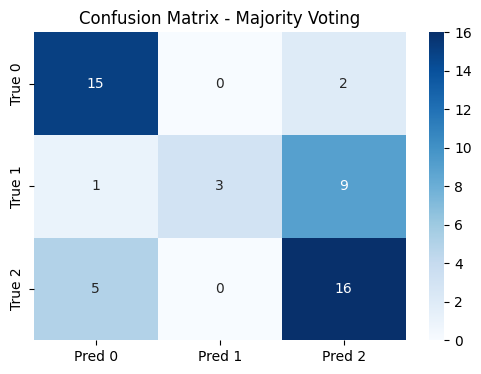

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard_preds = df_wh.groupby(group_col).apply(hard_hat).reset_index(name='final_pred_label')


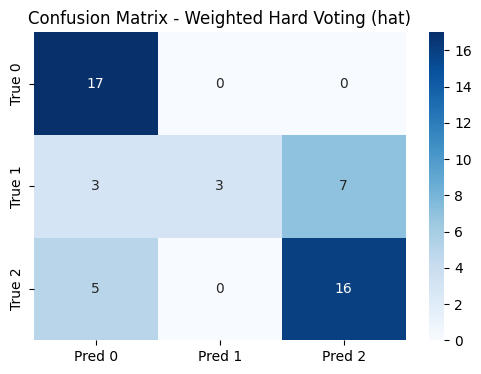

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soft_preds = df_ws.groupby(group_col, group_keys=False).apply(soft_hat).reset_index(name='final_pred_label')


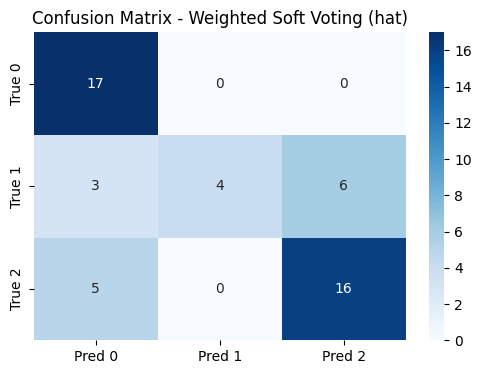

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard_preds = df_whn.groupby(group_col).apply(hard_no_hat).reset_index(name='final_pred_label')


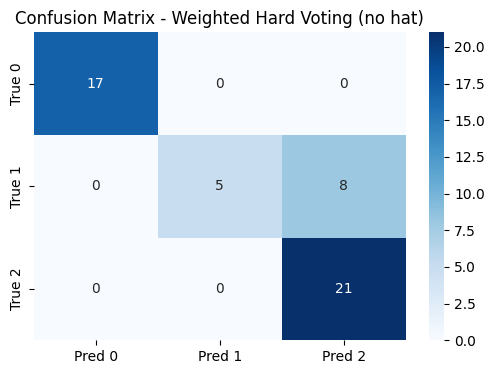

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soft_preds = df_wsn.groupby(group_col, group_keys=False).apply(soft_no_hat).reset_index(name='final_pred_label')


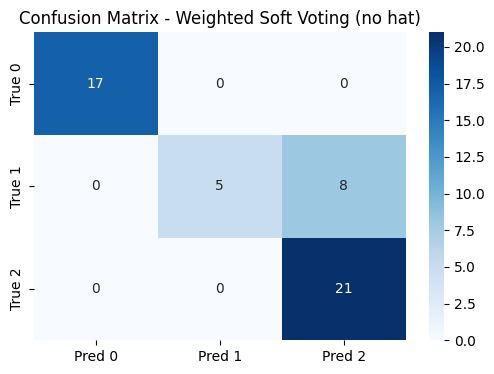

,Accuracy,F1-Score,Precision,Recall
Voting Strategy,,,,
Majority Voting,66.67,63.33,73.70,66.67
Weighted Hard Voting (hat),70.59,66.49,76.80,70.59
Weighted Soft Voting (hat),72.55,69.62,78.10,72.55
Weighted Hard Voting (no hat),84.31,82.08,88.64,84.31
Weighted Soft Voting (no hat),84.31,82.08,88.64,84.31


In [22]:
train_summary, train_confusion_matrices = all_voting_strategies(true_pred_train, 'original_rec', 'pred_label', 'true_label', 'softmax_values')
display(train_summary)

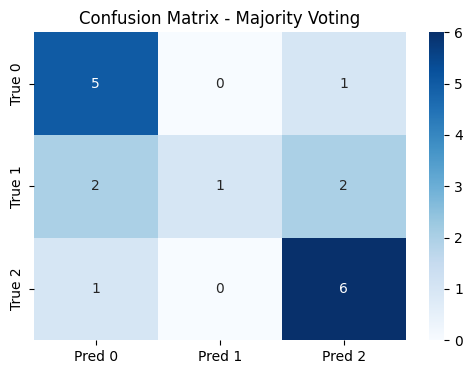

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard_preds = df_wh.groupby(group_col).apply(hard_hat).reset_index(name='final_pred_label')


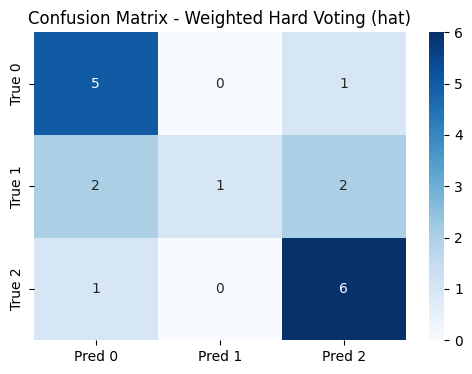

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soft_preds = df_ws.groupby(group_col, group_keys=False).apply(soft_hat).reset_index(name='final_pred_label')


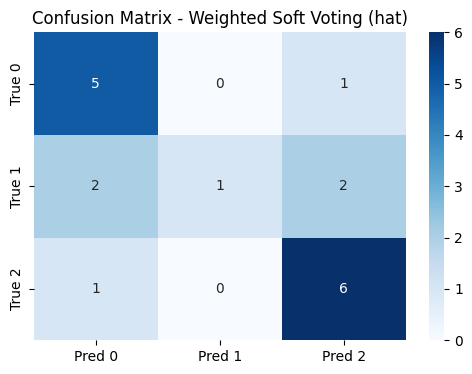

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard_preds = df_whn.groupby(group_col).apply(hard_no_hat).reset_index(name='final_pred_label')


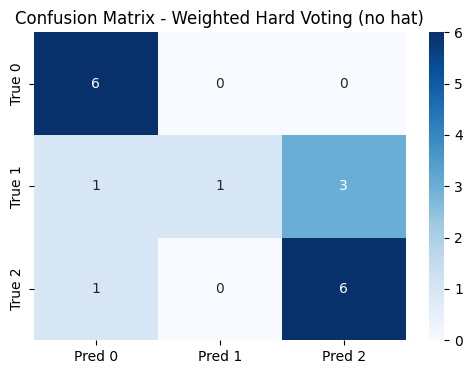

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soft_preds = df_wsn.groupby(group_col, group_keys=False).apply(soft_no_hat).reset_index(name='final_pred_label')


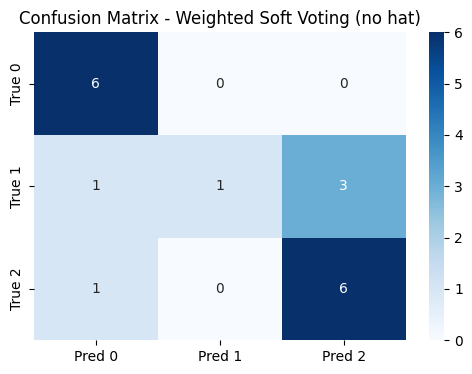

,Accuracy,F1-Score,Precision,Recall
Voting Strategy,,,,
Majority Voting,66.67,62.24,74.54,66.67
Weighted Hard Voting (hat),66.67,62.24,74.54,66.67
Weighted Soft Voting (hat),66.67,62.24,74.54,66.67
Weighted Hard Voting (no hat),72.22,67.00,78.70,72.22
Weighted Soft Voting (no hat),72.22,67.00,78.70,72.22


In [23]:
val_summary, val_confusion_matrices = all_voting_strategies(true_pred_val, 'original_rec', 'pred_label', 'true_label', 'softmax_values')
display(val_summary)

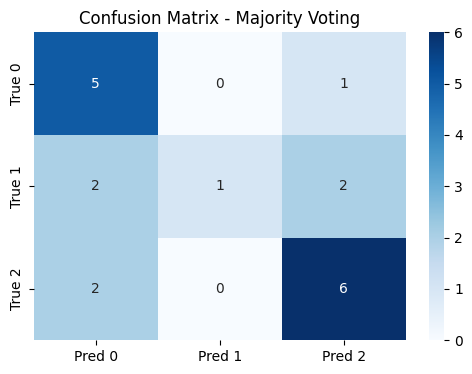

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard_preds = df_wh.groupby(group_col).apply(hard_hat).reset_index(name='final_pred_label')


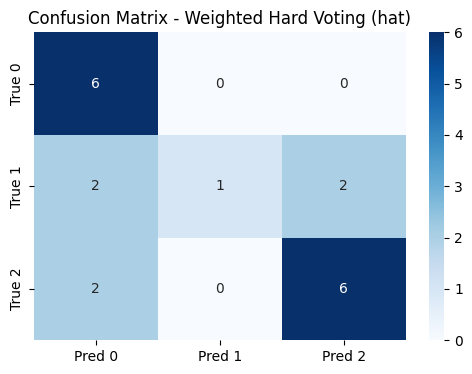

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soft_preds = df_ws.groupby(group_col, group_keys=False).apply(soft_hat).reset_index(name='final_pred_label')


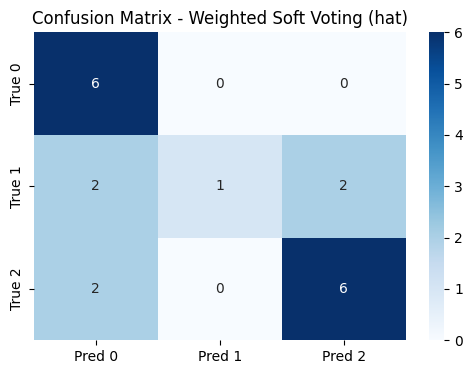

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hard_preds = df_whn.groupby(group_col).apply(hard_no_hat).reset_index(name='final_pred_label')


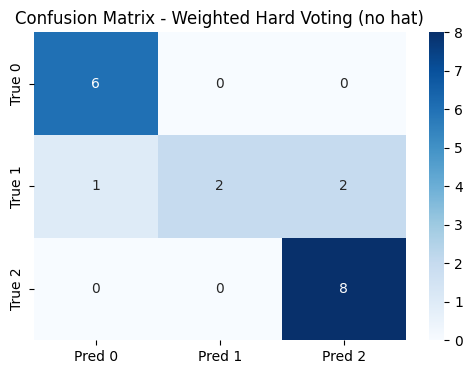

/var/folders/vn/xptkmbp94g59_0vxqhb4_6lc0000gn/T/ipykernel_6275/3869273582.py:77: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  soft_preds = df_wsn.groupby(group_col, group_keys=False).apply(soft_no_hat).reset_index(name='final_pred_label')


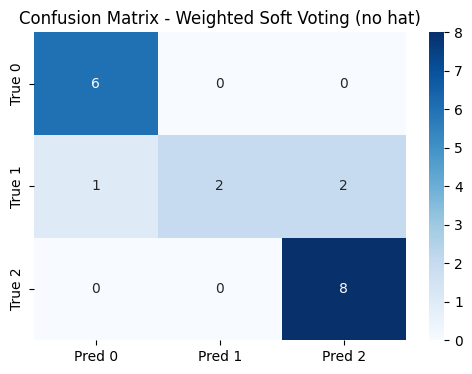

,Accuracy,F1-Score,Precision,Recall
Voting Strategy,,,,
Majority Voting,63.16,59.55,71.93,63.16
Weighted Hard Voting (hat),68.42,64.04,76.84,68.42
Weighted Soft Voting (hat),68.42,64.04,76.84,68.42
Weighted Hard Voting (no hat),84.21,81.61,87.07,84.21
Weighted Soft Voting (no hat),84.21,81.61,87.07,84.21


In [24]:
test_summary, test_confusion_matrices = all_voting_strategies(true_pred_test, 'original_rec', 'pred_label', 'true_label', 'softmax_values')
display(test_summary)